#**Clasificación de Categorías de Autos por Decision Trees**


**Objetivo**

El objetivo de este trabajo es aplicar un algoritmo para clasificar las cateogrías de vehículos a partir de datos tomados por un grupo de investigadores de la Universidad de La Plata. Se realizará un análisis, procesamiento de datos y un modelo de machine learning eficaz para resolver el problema que presenta el caso real.


**Enunciado**

Se parte de una base de datos para realizar el trabajo, los datos
corresponden a las mediciones obtenidas del paper “Equipo para la clasificación de vehículos utilizando lazos inductivos: un desarrollo innovador”, el cual relata el trabajo de recolección y objetivo de los datos propuestos

**1.** Realizar un análisis de los datos


In [1]:
# Vinculamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/Práctica/Ejemplos para Git/Clasificacion_autos.csv"
autos_df = pd.read_csv(path) 
# set seed for reproducibility
np.random.seed(0)

In [3]:
# 1. a. Se muestra cuantas dimensiones y registros contiene

autos_df.shape

(486, 6)

En este caso se ve que hay 486 filas con 6 columnas de datos

In [4]:
# 1. b. A continuación se muestran los tipos de datos que hay
autos_df.dtypes

Id              int64
T_AB          float64
Veloc           int64
Largo           int64
Desviacion    float64
Categ           int64
dtype: object

Los tipos de datos que hay son float64 e int64

In [5]:
# 1. c. Se realiza una descripción estadística de los datos
autos_df.describe()

,Id,T_AB,Veloc,Largo,Desviacion,Categ
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,49.882716,0.205527,74.203704,701.296296,1.006008,2.125514
std,30.600934,0.058160,18.688153,523.374785,0.337817,1.686419
min,0.000000,0.071000,23.000000,410.000000,0.310000,1.000000
25%,22.000000,0.170000,63.000000,499.000000,0.740000,1.000000
50%,51.000000,0.194000,74.000000,562.000000,1.085000,1.000000
75%,77.000000,0.228000,84.000000,638.000000,1.297500,3.000000
max,102.000000,0.618000,201.000000,8962.000000,1.620000,8.000000


De la descripción estadística se puede notar para el caso del Largo que puede haber un valor extremo ya que el 75 % de los valores se encuentra por debajo de 638 y el valor max es de 8962, cosa que es muy rara. Luego se verificará de forma gráfica este punto.
Algo similar puede estar ocurriendo para el caso de la velocidad.

In [6]:
# Aquí se obtiene información sobre tipos de datos, cantidad de valores nulos, filas, columnas, etc.
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          486 non-null    int64  
 1   T_AB        486 non-null    float64
 2   Veloc       486 non-null    int64  
 3   Largo       486 non-null    int64  
 4   Desviacion  486 non-null    float64
 5   Categ       486 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


In [7]:
# Aquí se ven las cantidades de datos que hay por cada categoría

print(autos_df.groupby('Categ').size())

Categ
1    279
2     72
3     31
4     55
5     20
6      9
7     17
8      3
dtype: int64


Algo importante que se puede observar de la celda anterior es que hay un desbalance de datos, es decir que hay muchos valores para la categoría 1 y para los demás casos hay muy pocos, en algunos casos solo 3 valores. Esto puede llegar a influir en el rendimiento del modelo, cosa que se comprobabrá más adelante.

**2.** Graficar y analizar los datos.

In [8]:
# Se importan las librerias 
import matplotlib.pyplot as plt
import seaborn as sns

A continuación se realiza un histograma de todas las variables

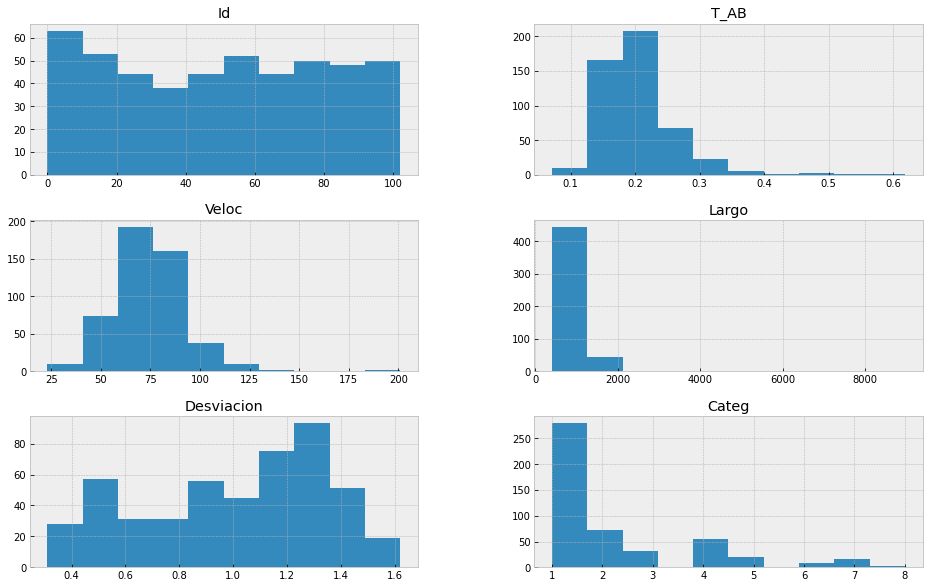

In [9]:
# Visualizamos rápidamente las caraterísticas de entrada
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('bmh')
autos_df.hist()
plt.show()

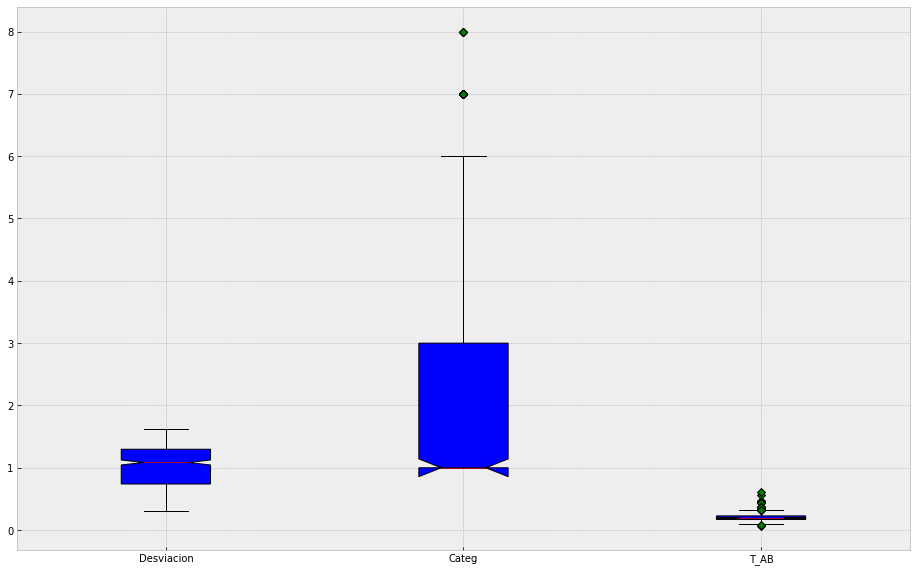

In [10]:
# Se realizan los diagramas de bigotes y cajas
green_diamond = dict(markerfacecolor='g', marker='D')
data = [autos_df['Desviacion'],autos_df['Categ'],autos_df['T_AB']]
plt.boxplot(data,labels=['Desviacion','Categ', 'T_AB'], notch = True, patch_artist=True, flierprops=green_diamond)
#plt.boxplot(autos_df['Categ'], notch = True) 
  
plt.show() 

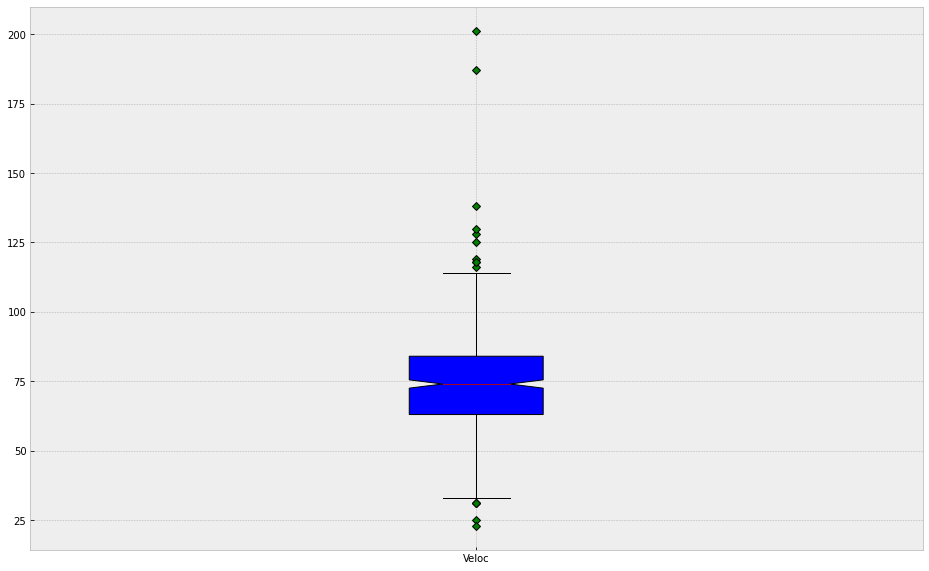

In [11]:
# Se realizan los diagramas de bigotes y cajas
green_diamond = dict(markerfacecolor='g', marker='D')
data = [autos_df['Veloc']]
plt.boxplot(data,labels=['Veloc'], notch = True, patch_artist=True, flierprops=green_diamond)
#plt.boxplot(autos_df['Categ'], notch = True) 
  
plt.show() 

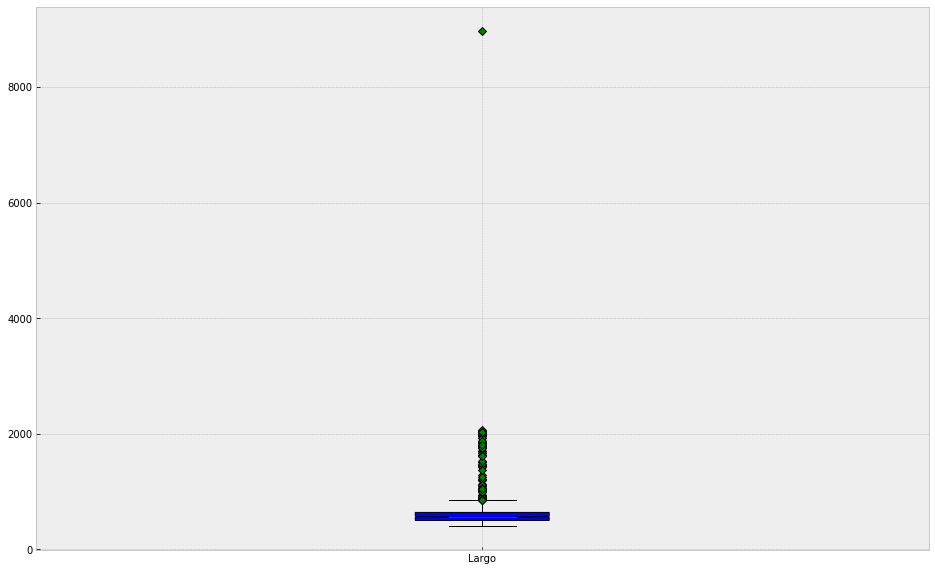

In [12]:
# Se realizan los diagramas de bigotes y cajas
green_diamond = dict(markerfacecolor='g', marker='D')
data = [autos_df['Largo']]
plt.boxplot(data,labels=['Largo'], notch = True, patch_artist=True, flierprops=green_diamond)
#plt.boxplot(autos_df['Categ'], notch = True) 
plt.show() 

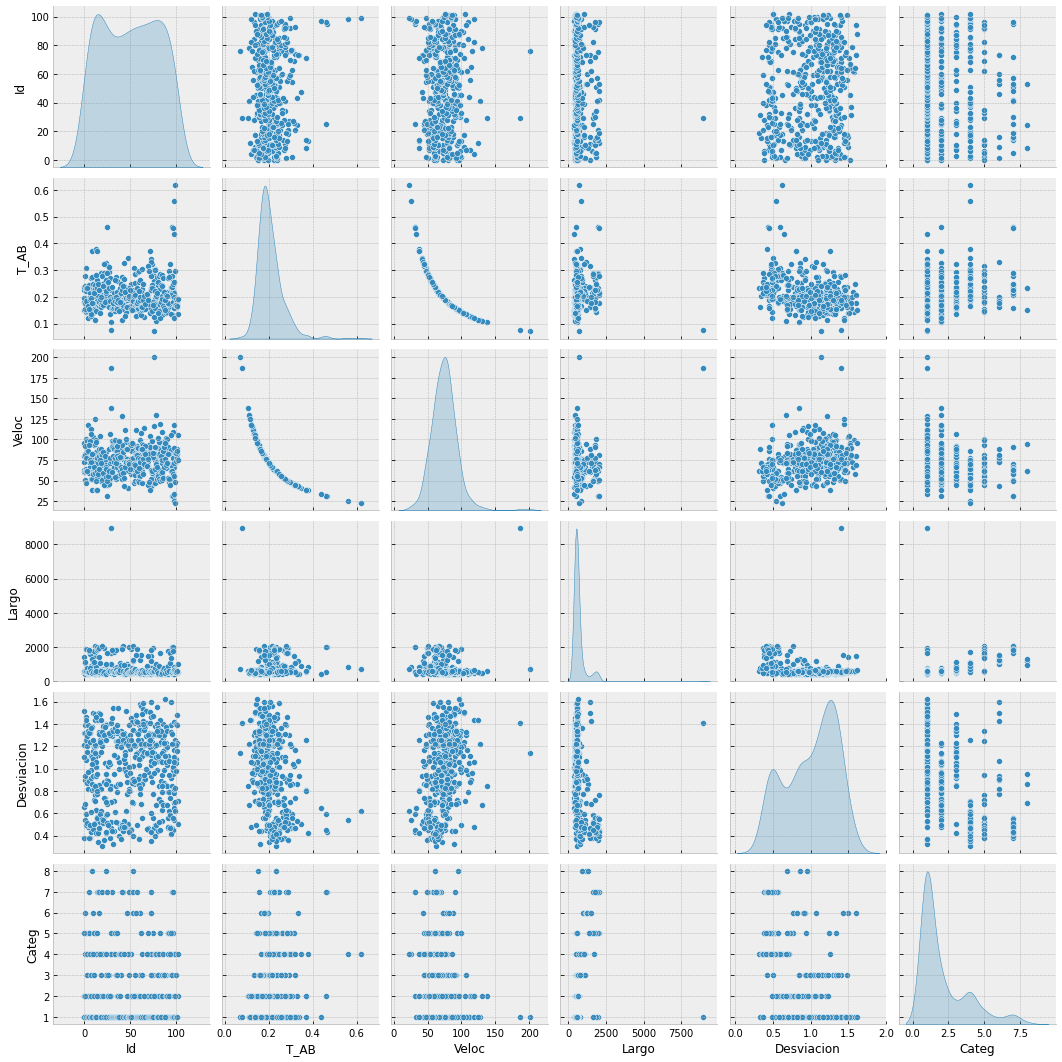

In [13]:
# Se chequea rapidamente la distribucion conjunta de las columnas de los datos.

sns.pairplot(autos_df, diag_kind="kde")

Del gráfico anterior se no se observa relación lineal entre las variables excepto en algún caso algo leve, razón por la cual se calcula el coeficiente de correlación.

In [14]:
print(autos_df.corrwith(autos_df.Desviacion))

Id            0.049936
T_AB         -0.379074
Veloc         0.353642
Largo        -0.320821
Desviacion    1.000000
Categ        -0.629726
dtype: float64


In [15]:
print(autos_df.corrwith(autos_df.Categ))

Id           -0.070792
T_AB          0.311773
Veloc        -0.301952
Largo         0.533119
Desviacion   -0.629726
Categ         1.000000
dtype: float64


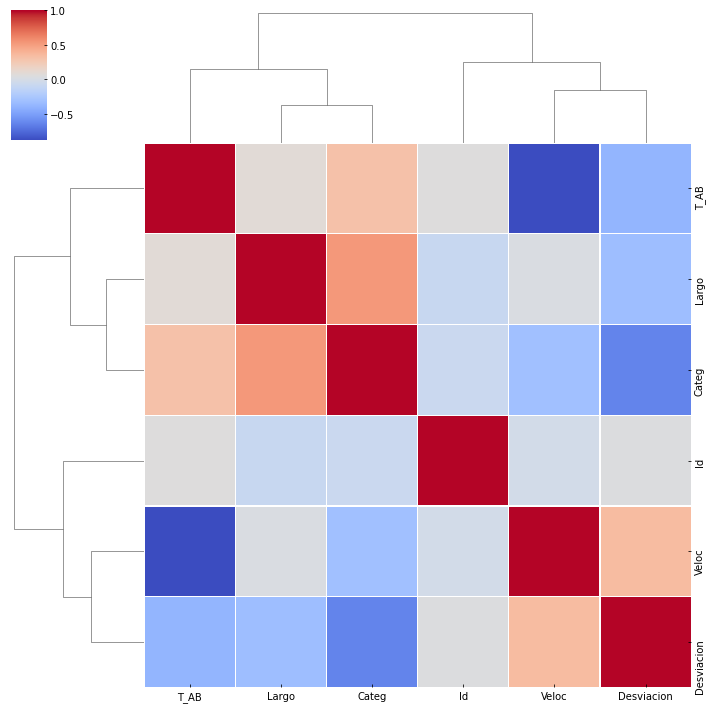

In [16]:
corr = autos_df.corr()

cg = sns.clustermap(corr.fillna(0), cmap ='coolwarm', linewidths = 0.2,
                    method = 'complete', xticklabels=1,figsize = (10,10)) 
cg

De los coeficientes calculados se observa una correlación inversa de -0.62 para el caso de Desviación con Categ lo cual nos dice que a mayor desviación tenemos una categoría menor y viceversa. Además se puede asumir que es una buena variable para utilizar en la predicción. 
Por otro lado cuando se realiza la correlación de Categ (la variable a predecir) con las demás variables se observa que existe una correlación directa de 0.53 con la variable Largo, razón por lo cual se la puede tomar como otra variable para la predicción.

Esto mismo se pude ver en el mapa donde la intensidad de colores nos da cuenta de la relación que existe entre las variables ya sea para correlaciones directas e inversas.

**CONCLUSIÓN**

De los histogramas se puede concluir que la distribución de los datos es aproximadamente normal para la Veloc y el T_AB, no así para el resto de los casos. Además se nota que para el caso de Categ y largo hay mayor cantidad de muestras a valores más bajos.


En los diagramas de cajas se puede ver para el caso del largo, T_AB, Categ y Veloc existen valores extremos por fuera de los bigotes. Para el caso de las demás variables no se obsevan valores extremos.

Se observa colinealidad entre las variables Categ y Desviación (colinealidad inversa) y entre Categ y Largo (colinealidad directa) de acuerdo a los gráficos y a los valores de la matriz de correlación.

##k-means usando scikit-learn

La aplicación del algoritmo de `k-means`con `scikit-learn` es bastante sencilla. En primer lugar, se instancia la clase `KMeans`, y se establece el número de clusters que se está buscando; en caso de no saberlo, se tiene por defecto que `n_clusters=8`. En segundo lugar, se ajusta el método a los datos. A continuación se observan estos pasos y una gráfica del dataset:

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Para un mejor ajuste del modelo se reemplaza el valor extremo 8962 de la variable Largo por el valor de la mediana de 562.

In [18]:
autos_df['Largo'].replace(
    to_replace=[8962],
    value=562,
    inplace=True
)

In [19]:
# Verificamos si se reemplazo correctamente
autos_df['Largo'].describe()

count     486.000000
mean      684.012346
std       364.640079
min       410.000000
25%       499.000000
50%       562.000000
75%       637.750000
max      2072.000000
Name: Largo, dtype: float64

Como se pude observar el valor máximo ahora es 2072.

In [20]:
X = np.array(autos_df[["Veloc", "Largo", "Desviacion"]])
y = np.array(autos_df["Categ"])

Ahora se verá una gráfica en 3D con 8 colores representando las categorías.

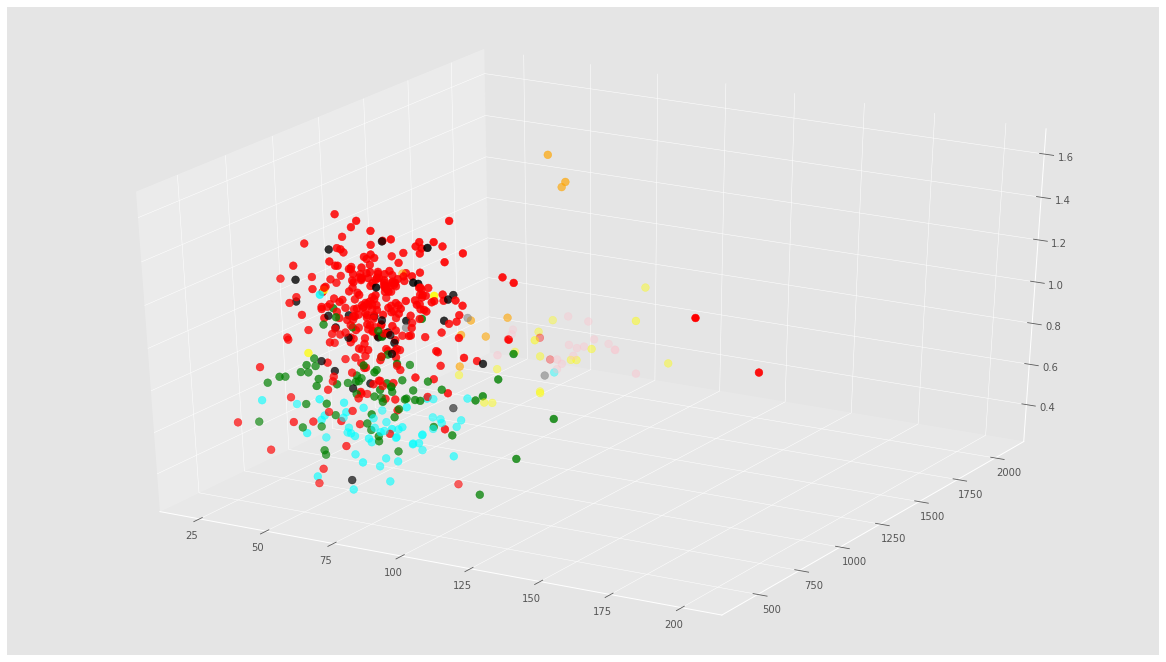

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','black','cyan','yellow', 'orange','pink', 'grey']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

#**Obtener el valor K**
Si se necesitara hallar el valor de K se podría hacer una gráfica e intentar hallar el “punto de codo”. Para nuestro caso ya se sabe que son 8 las categorías. Este es el resultado:



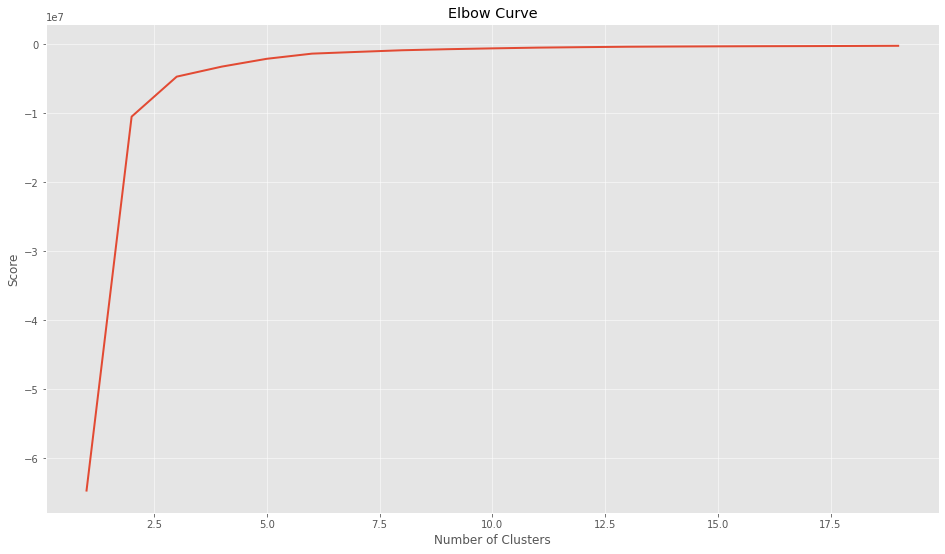

In [22]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

A partir de la curva a priori se dirían que los cluster serían 5, quedando afuera tres. Este calculo es aproximado, varía mucho en función de los datos y las variables utilizadas para su predicción.

#**Ejecutamos K-Means**
Se ejecuta el algoritmo para 8 clusters y obtenemos las etiquetas y los centroids.

In [23]:
kmeans = KMeans(n_clusters=8).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.71666667e+01 2.00291667e+03 4.91666667e-01]
 [7.76037736e+01 5.57471698e+02 1.15905660e+00]
 [6.80555556e+01 1.09877778e+03 6.59444444e-01]
 [6.61818182e+01 1.50354545e+03 7.50909091e-01]
 [7.77500000e+01 4.72576923e+02 1.08378205e+00]
 [6.17058824e+01 8.20235294e+02 5.59117647e-01]
 [6.72222222e+01 1.79094444e+03 4.97777778e-01]
 [7.24102564e+01 6.35807692e+02 1.04564103e+00]]


Ahora se verá esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

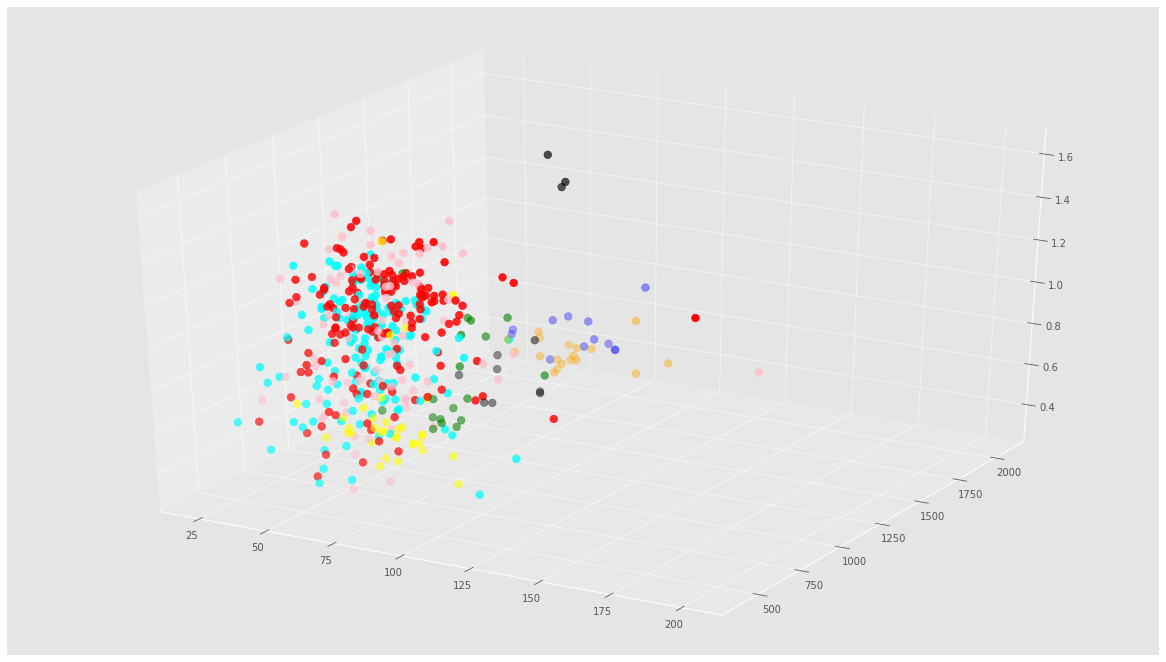

In [24]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

Aqui se puede ver que el Algoritmo de K-Means con K=8 ha agrupado a los 486 vehículos por categoría, teniendo en cuenta las 3 dimensiones que se utilizaron: 1, 2, 3, 4, 5, 6, 7 y 8. Pareciera que no hay necesariamente una relación en los grupos.

Se realizarán 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

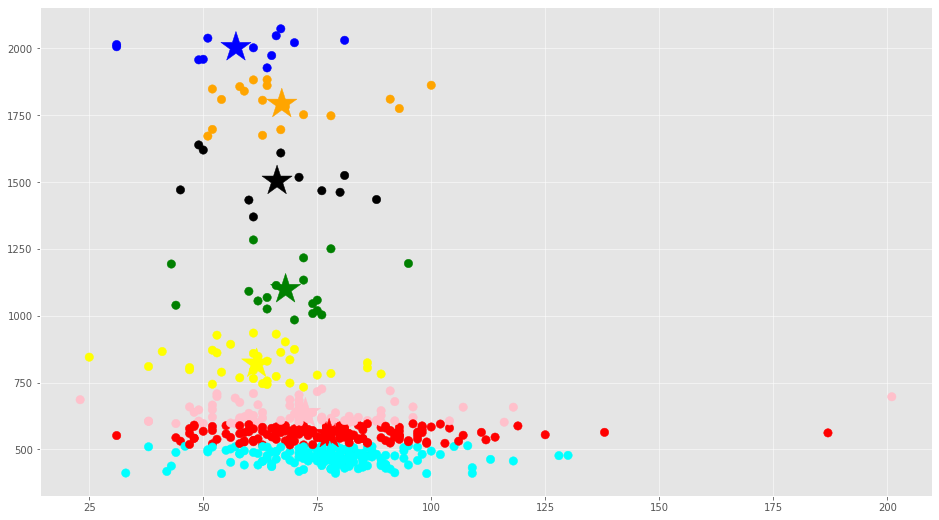

In [26]:
# Getting the values and plotting it
f1 = autos_df['Veloc'].values
f2 = autos_df['Largo'].values

colores=['blue','red','green','black','cyan','yellow', 'orange','pink'] 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

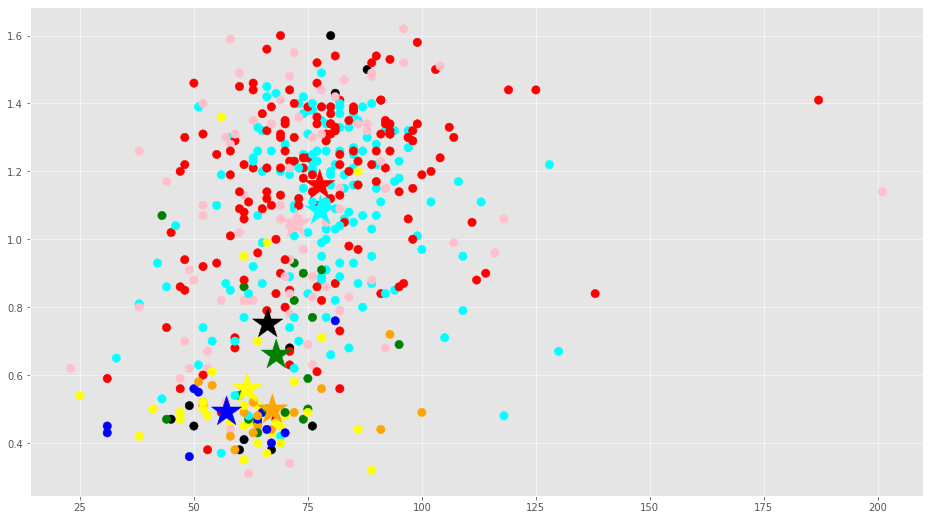

In [27]:
# Getting the values and plotting it
f1 = autos_df['Veloc'].values
f2 = autos_df['Desviacion'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

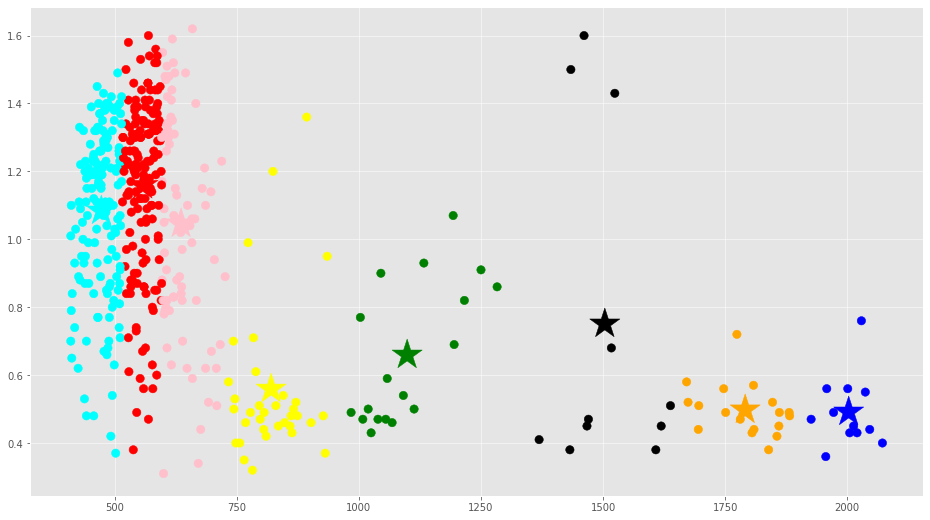

In [28]:
# Getting the values and plotting it
f1 = autos_df['Largo'].values
f2 = autos_df['Desviacion'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Se puede ver que cantidad por Categoría tiene cada cluster

In [29]:
copy =  pd.DataFrame()
copy['Veloc']=autos_df['Veloc'].values
copy['Categ']=autos_df['Categ'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,12
1,red,159
2,green,18
3,black,11
4,cyan,156
5,yellow,34
6,orange,18
7,pink,78


Si se compara este resultado con los datos reales de cantidad por categoría se comprueba que existe una diferencia notable. En parte esto se debe al desbalance de datos ya que según la estimación del método del codo se estarían teniendo entre 5 y 6 cluster, sin embargo se forzo el sistema a que lo haga con 8.

**3.** Modelo de clasificación

Para este caso se decide aplicar el modelo de Árboles de decisión (Clasificación) al cual se le variaran los parámetros para optimizar sus predicciones.

**¿Qué es un árbol de decisión?**

Son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones. Pueden realizar tareas de clasificación o regresión (acrónimo del inglés CART).

Tienen un primer nodo llamado raíz (root) y luego se descomponen el resto de atributos de entrada en dos ramas (podrían ser más) planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que se este clasificando.

#Preprocesamiento

#Detecta datos faltantes y elimina filas

Se corrobora la existencia de datos nulos o faltantes.

In [30]:
autos_df.isnull().sum()

Id            0
T_AB          0
Veloc         0
Largo         0
Desviacion    0
Categ         0
dtype: int64

Para este caso no existen valores faltantes ya que los datos están "limpios".

**Se selecciona la variable a predecir**

La variable objetivo es "Categ" (Categoría)

In [31]:
y = autos_df.Categ

**Se seleccionan las "Features"**

En este momento se eligen cuales son las variables que se utilizaran para realizar la predicción en el modelo. Se puede trabajar con todas las variables o algunas veces se seleccionan las que se consideran más relevantes.
Para este caso se utilizan todas las variables excepto Id y T_AB.

In [32]:
autos_features = ['Veloc', 'Largo', 'Desviacion']

In [33]:
# Por convención se llama X a estás características

X = autos_df[autos_features]

#**Se Construye el Modelo**

Para ello se utiliza la librería **scikit-learn**. Al realizar la codificación es escrita como **sklearn**.

Los pasos que se utilizan para construir el modelo son:

**Definición:** Que tipo de modelo se usará? Se definen los parámetros del modelo seleccionado.

**Fit (Ajuste):** Se "capturan" patrones de los datos provistos. Es la parte esencial del modelado.

**Predicción:** Es la predicción literal del modelo.

**Evaluación:** Se determina la precisión del modelo con los datos de validación.

Se dividen los datos en dos conjuntos, uno de entrenamiento y otro de validación del modelo. De esta menera se corrobora que el modelo es válido para predecir con nuevos datos.

## **Decision Tree**

A continuación se aplica el modelo de Árboles de decisión 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
np.random.seed(0)


Se separan los conjuntos de entrenamiento y prueba

In [35]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

Antes de entrenar el modelo, se utiliza un GridSearch para encontrar los hiperparámetros `max_depth` y `max_leaf_nodes` óptimos

In [36]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_param = {'max_depth':np.arange(2,20), 'max_leaf_nodes':np.arange(2,20)}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, grid_param , n_jobs=-1, cv=5)

grid.fit(train_X,train_y)
print(grid.best_params_)
print("")
print(grid.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 4, 'max_leaf_nodes': 10}

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=42)


Se encuentra que el mejor modelo es el que tiene max deph = 4, max leaf nodes = 10 y el random states = 42.
Con estos valores se realiza la predicción.

In [37]:
#Elegimos como modelo el mejor estimador encontrado anteriormente
model = grid.best_estimator_

#Entrenamos el modelo
model.fit(train_X,train_y) 

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=42)

A continuación se calcula cual es la importancia de cada característica en el modelo.

In [38]:
model.feature_importances_

array([0.02012389, 0.5676193 , 0.41225681])

De los datos anteriores se puede concluir que para el modelo las variables 'Largo' y 'Desviación' son las que más relevancia tienen para la predicción. Por lo cual se podría realizar el modelo de predicción sólo con las variables "Variedad" y "Largo" obteniendo similares resultados.

**4.** Visualización del output del modelo

              precision    recall  f1-score   support

           1       0.94      0.91      0.92        53
           2       0.52      0.85      0.65        13
           3       0.67      0.50      0.57         8
           4       1.00      0.91      0.95        11
           5       0.50      0.43      0.46         7
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.79        98
   macro avg       0.58      0.48      0.49        98
weighted avg       0.82      0.79      0.79        98



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(37.32000000000001, 0.5, 'Predicted label')

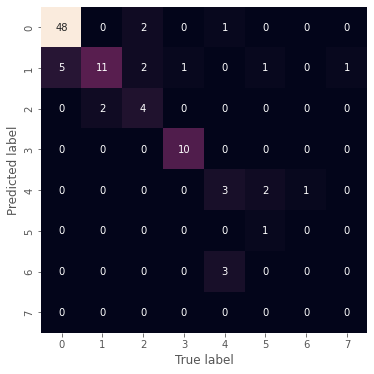

In [39]:
# Confusion Matrix y Reporte
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Obtengamos algunas predicciones para evaluar el rendimiento del modelo
y_fit = model.predict(val_X)

print(classification_report(val_y,y_fit))

cm = confusion_matrix(val_y,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(cm.T ,square=True , annot=True, cbar=False, xticklabels=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

De la matriz de confusión se puede observar que sobre la diagonal de la misma se concentran los aciertos. Para este caso se ven que ha habido buenas predicciones ya que los mayor cantidad de valores se encuentran sobre dicha diagonal. Además se observa que el valor de precisión es de 79%.

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(
            y_true    = val_y,
            y_pred    = y_fit,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 78.57142857142857 %


Se observa un accuracy del 78.6% el cual es un buen valor de predicción. 

A continuación se gráfica el árbol con 4 niveles de split

[Text(516.15, 440.31600000000003, 'X[2] <= 0.965\ngini = 0.618\nsamples = 388\nvalue = [226, 59, 23, 44, 13, 5, 16, 2]'),
 Text(306.9, 342.468, 'X[1] <= 638.5\ngini = 0.778\nsamples = 160\nvalue = [30, 50, 5, 43, 12, 2, 16, 2]'),
 Text(111.6, 244.62, 'X[1] <= 449.5\ngini = 0.556\nsamples = 81\nvalue = [26, 47, 3, 4, 1, 0, 0, 0]'),
 Text(55.8, 146.772, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0, 0, 0, 0, 0]'),
 Text(167.39999999999998, 146.772, 'X[0] <= 77.5\ngini = 0.47\nsamples = 67\nvalue = [12, 47, 3, 4, 1, 0, 0, 0]'),
 Text(111.6, 48.924000000000035, 'gini = 0.619\nsamples = 40\nvalue = [10, 22, 3, 4, 1, 0, 0, 0]'),
 Text(223.2, 48.924000000000035, 'gini = 0.137\nsamples = 27\nvalue = [2, 25, 0, 0, 0, 0, 0, 0]'),
 Text(502.2, 244.62, 'X[1] <= 1102.0\ngini = 0.69\nsamples = 79\nvalue = [4, 3, 2, 39, 11, 2, 16, 2]'),
 Text(390.59999999999997, 146.772, 'X[2] <= 0.74\ngini = 0.248\nsamples = 44\nvalue = [1, 3, 1, 38, 0, 1, 0, 0]'),
 Text(334.79999999999995, 48.924000000000035, 'gi

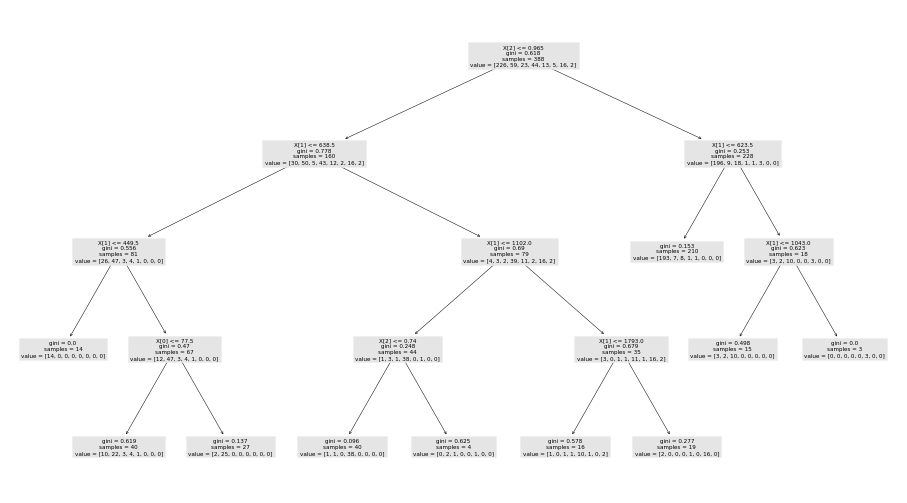

In [41]:
from sklearn import tree
tree.plot_tree(model)

Instalamos un complemento para poder exportar nuestro árbol a un archivo pdf.

In [42]:
!pip install graphviz

In [43]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("autos_df") 

'autos_df.pdf'

## **Random Forests**

El modelo de Decision Trees tiene un rendimiento muy bueno en este caso. Realicemos el modelamiento utilizando ahora un bosque aleatorio.

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, min_samples_split=8, max_depth=9)

model_forest.fit(train_X,train_y)

y_fit = model_forest.predict(val_X)

Se calacula la importancia de cada variable

In [45]:
model_forest.feature_importances_

array([0.16680781, 0.4299658 , 0.40322639])

Nuevamente se ve que las mayor impmortancia la tienen las variables 'Desviación' y 'Largo'.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.89      0.92      0.91        53
           2       0.58      0.85      0.69        13
           3       0.33      0.12      0.18         8
           4       0.85      1.00      0.92        11
           5       0.50      0.14      0.22         7
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.79        98
   macro avg       0.52      0.50      0.49        98
weighted avg       0.76      0.79      0.76        98



Text(33.0, 0.5, 'Predicted label')

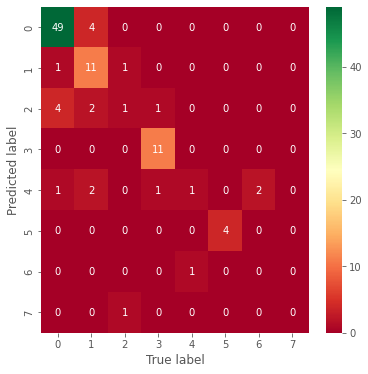

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Obtengamos algunas predicciones para evaluar el rendimiento del modelo
y_fit = model_forest.predict(val_X)

print(classification_report(val_y,y_fit))

cm = confusion_matrix(val_y,y_fit)

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(val_y,y_fit), annot=True, cmap='RdYlGn');
plt.xlabel('True label')
plt.ylabel('Predicted label')


Los resultados son casi los mismos que para el caso del árbol de decisión que se vimos anteriormente. 

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(
            y_true    = val_y,
            y_pred    = y_fit,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 78.57142857142857 %


A priori en ambos casos el rendimiento es muy similar. Probablemente si a nuestro random forests lo optimizamos obtendremos mejores resultados.

**Conclusión general**


En el presente trabajo se realizo un análisis detallado a fin de desarrollar un árbol de decisión. Se revisaron los datos de entrada, se ejecutó un análisis visual para mejor comprensión de los mismos, luego se aplico el modelo de clasificación (Decision Tree en nuestro caso), se lo valido, y finalmente se gráfico el output del modelo para ver en detalle los resultados de las predicciones.

El accuracy obtenido luego de realizar la estimación de los mejores parámetros y la validación cruzada fue del 79%. Es decir que con las variables que se le paso al modelo, éste pudo predecir la categoría de vehículo con un 79% de precisión.

Por otro lado, se realizo la predicción con el modelo de Random Forests y se observo que la precisión fue casi la misma. Cabe aclarar que en este caso no se hizo ningún tipo de optimización del modelo.

Si bien los resultados no dan un valor muy alto la idea fue realizar todo el desarrollo del modelo buscando aplicar conceptos aprendidos durante el cursado de la diplomatura.

Como recomendación se sugiere tratar de obtener más valores a fin de que no exista un desbalance tan grande en las cantidades por categorías ya que como se corroboró el modelo no es tan preciso en sus predicciones.

